## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
import matplotlib.pyplot as plt
%matplotlib inline

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=False):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
x_train.shape[1:]

(32, 32, 3)

In [6]:
def build_mlp(input_data_shape):
    model = Sequential()
    
    #卷積層1與池化層1
    model.add(Conv2D(filters=256,kernel_size=(3, 3), input_shape=input_data_shape, activation='relu', padding='same'))
    model.add(Dropout(rate=0.2))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #卷積層2與池化層2
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Dropout(rate=0.2))
    model.add(MaxPooling2D(pool_size=(2, 2)))

#     #卷積層3與池化層3
#     model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
#     model.add(Dropout(rate=0.2))
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     #卷積層3與池化層4
#     model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
#     model.add(Dropout(rate=0.2))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #建立神經網路(平坦層、隱藏層、輸出層)
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(10, activation='softmax'))

    return model

In [7]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 100
BATCH_SIZE = 64
MOMENTUM = 0.95

In [8]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))

    model = build_mlp(x_train.shape[1:])
    #model.summary()
    
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 56s 1ms/step - loss: 2.3171 - acc: 0.1022 - val_loss: 2.3096 - val_acc: 0.1000
Epoch 2/100
50000/50000 [==============================] - 54s 1ms/step - loss: 2.3083 - acc: 0.0990 - val_loss: 2.3067 - val_acc: 0.1000
Epoch 3/100
50000/50000 [==============================] - 54s 1ms/step - loss: 2.3093 - acc: 0.0986 - val_loss: 2.3081 - val_acc: 0.1000
Epoch 4/100
50000/50000 [==============================] - 53s 1ms/step - loss: 2.3086 - acc: 0.1003 - val_loss: 2.3110 - val_acc: 0.1000
Epoch 5/100
50000/50000 [==============================] - 53s 1ms/step - loss: 2.3083 - acc: 0.0984 - val_loss: 2.3114 - val_acc: 0.1000
Epoch 6/100
50000/50000 [==============================] - 53s 1ms/step - loss: 2.3097 - acc: 0.1012 - val_loss: 2.3058 - val_acc: 0.1000
Epoch 7/100
50000/50000 [==============================] - 53s 1ms/step - loss: 2.3081 - acc

50000/50000 [==============================] - 53s 1ms/step - loss: 0.0853 - acc: 0.9713 - val_loss: 1.1410 - val_acc: 0.7440
Epoch 18/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.0862 - acc: 0.9726 - val_loss: 1.1970 - val_acc: 0.7395
Epoch 19/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.1069 - acc: 0.9661 - val_loss: 1.2416 - val_acc: 0.7376
Epoch 20/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.0895 - acc: 0.9710 - val_loss: 1.1936 - val_acc: 0.7280
Epoch 21/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.0869 - acc: 0.9722 - val_loss: 1.2359 - val_acc: 0.7286
Epoch 22/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.0797 - acc: 0.9738 - val_loss: 1.1692 - val_acc: 0.7412
Epoch 23/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.0776 - acc: 0.9761 - val_loss: 1.2147 - val_acc: 0.7365
Epoch 24/100
50000/50000 [==============

50000/50000 [==============================] - 53s 1ms/step - loss: 0.1772 - acc: 0.9655 - val_loss: 2.2936 - val_acc: 0.7204
Epoch 77/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.1780 - acc: 0.9643 - val_loss: 2.2992 - val_acc: 0.6999
Epoch 78/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.1879 - acc: 0.9642 - val_loss: 2.2516 - val_acc: 0.7098
Epoch 79/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.2138 - acc: 0.9596 - val_loss: 2.1727 - val_acc: 0.6997
Epoch 80/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.2178 - acc: 0.9594 - val_loss: 2.3694 - val_acc: 0.7051
Epoch 81/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.2262 - acc: 0.9587 - val_loss: 2.7376 - val_acc: 0.6957
Epoch 82/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.2997 - acc: 0.9496 - val_loss: 2.4832 - val_acc: 0.6856
Epoch 83/100
50000/50000 [==============

50000/50000 [==============================] - 53s 1ms/step - loss: 0.0072 - acc: 0.9980 - val_loss: 1.1018 - val_acc: 0.7605
Epoch 94/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.0090 - acc: 0.9973 - val_loss: 1.1091 - val_acc: 0.7550
Epoch 95/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.0087 - acc: 0.9975 - val_loss: 1.1394 - val_acc: 0.7546
Epoch 96/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.0084 - acc: 0.9978 - val_loss: 1.1052 - val_acc: 0.7585
Epoch 97/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.0070 - acc: 0.9983 - val_loss: 1.1236 - val_acc: 0.7552
Epoch 98/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.0093 - acc: 0.9973 - val_loss: 1.1209 - val_acc: 0.7559
Epoch 99/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.0086 - acc: 0.9974 - val_loss: 1.1466 - val_acc: 0.7509
Epoch 100/100
50000/50000 [=============

50000/50000 [==============================] - 53s 1ms/step - loss: 2.1161 - acc: 0.2606 - val_loss: 2.1480 - val_acc: 0.3046
Epoch 10/100
50000/50000 [==============================] - 53s 1ms/step - loss: 2.0899 - acc: 0.2678 - val_loss: 2.1244 - val_acc: 0.3092
Epoch 11/100
50000/50000 [==============================] - 53s 1ms/step - loss: 2.0639 - acc: 0.2765 - val_loss: 2.1016 - val_acc: 0.3193
Epoch 12/100
50000/50000 [==============================] - 53s 1ms/step - loss: 2.0398 - acc: 0.2857 - val_loss: 2.0796 - val_acc: 0.3214
Epoch 13/100
50000/50000 [==============================] - 53s 1ms/step - loss: 2.0165 - acc: 0.2938 - val_loss: 2.0583 - val_acc: 0.3185
Epoch 14/100
50000/50000 [==============================] - 53s 1ms/step - loss: 1.9963 - acc: 0.2992 - val_loss: 2.0394 - val_acc: 0.3280
Epoch 15/100
50000/50000 [==============================] - 53s 1ms/step - loss: 1.9773 - acc: 0.3058 - val_loss: 2.0220 - val_acc: 0.3299
Epoch 16/100
50000/50000 [==============

50000/50000 [==============================] - 53s 1ms/step - loss: 1.5643 - acc: 0.4508 - val_loss: 1.6336 - val_acc: 0.4623
Epoch 69/100
50000/50000 [==============================] - 53s 1ms/step - loss: 1.5586 - acc: 0.4521 - val_loss: 1.6269 - val_acc: 0.4672
Epoch 70/100
50000/50000 [==============================] - 53s 1ms/step - loss: 1.5552 - acc: 0.4556 - val_loss: 1.6229 - val_acc: 0.4661
Epoch 71/100
50000/50000 [==============================] - 53s 1ms/step - loss: 1.5479 - acc: 0.4546 - val_loss: 1.6153 - val_acc: 0.4720
Epoch 72/100
50000/50000 [==============================] - 53s 1ms/step - loss: 1.5470 - acc: 0.4564 - val_loss: 1.6139 - val_acc: 0.4679
Epoch 73/100
50000/50000 [==============================] - 53s 1ms/step - loss: 1.5389 - acc: 0.4579 - val_loss: 1.6087 - val_acc: 0.4669
Epoch 74/100
50000/50000 [==============================] - 53s 1ms/step - loss: 1.5337 - acc: 0.4600 - val_loss: 1.6043 - val_acc: 0.4712
Epoch 75/100
50000/50000 [==============

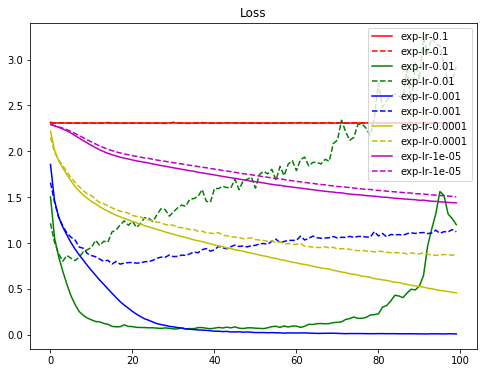

In [9]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

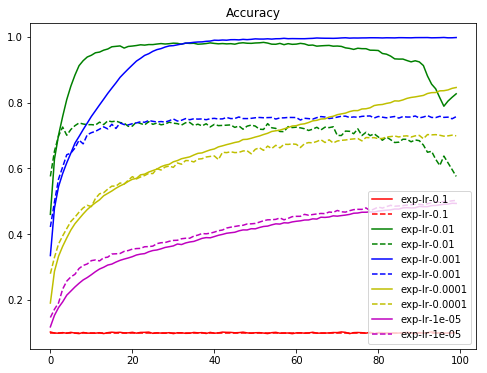

In [10]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Learning rate大約在1e-3 ~ 1e-4能得到較佳結果